In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



In [71]:
df = pd.read_excel('default of credit card clients.xls')
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 1. Quick data check

In [72]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [73]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [74]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 2. EDA

In [75]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

### Label Variable


In [76]:
df.rename(columns={'default payment next month' : 'Y'}, inplace=True)

In [77]:
df['Y'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Y, dtype: float64

-> imbalanced data 

### Categorical Variable

- SEX, EDUCATION, MARRRIAGE

In [78]:
#SEX: 1: Male, 2: Female
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [79]:
#EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [80]:
# The values 5,6,0: we are not having description so we can add up them in 4, which is Others.

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [81]:
#MARRIAGE
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [82]:
# 0 values have no description so adding them to value 3 which means Others
df.loc[(df['MARRIAGE'] == 0), 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [83]:
## Plot categorical variable vs Label variable

In [84]:
categorical_col = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_col]
df_cat['Is Default'] = df['Y']

<ipython-input-84-6e81c857fb02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Is Default'] = df['Y']


In [85]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

C:\Users\Laptop MD\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


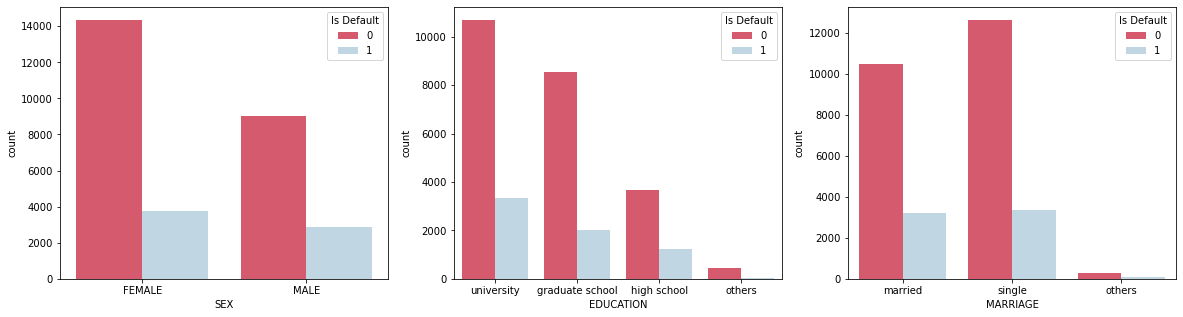

In [308]:
figure, ax = plt.subplots(1,3, figsize=[20,5])
i = 0
for col in categorical_col:
    sns.countplot(x = col, hue = 'Is Default', data = df_cat, palette=['#EB455F','#BAD7E9'], ax=ax[i])
    i+=1

- Repayment Status: PAY_X variables

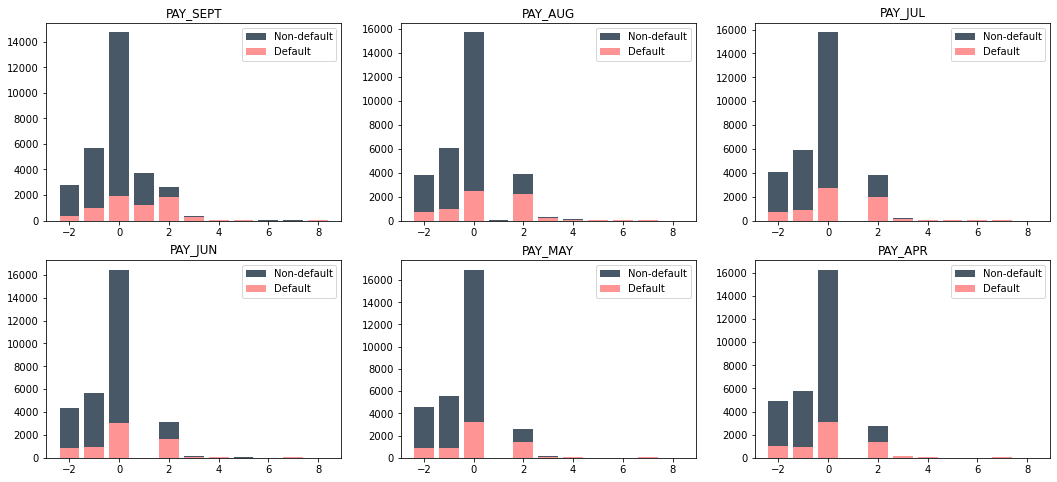

In [321]:
PAY_col = ['PAY_SEPT','PAY_AUG', 'PAY_JUL','PAY_JUN', 'PAY_MAY','PAY_APR']
figure, ax = plt.subplots(2,3, figsize=[18,8])
#figure.set_size_inches(18,8)


for i in range(len(PAY_col)):
    row,col = int(i/3), i%3
    
    ax[row,col].bar(df[PAY_col[i]].value_counts().index, df[PAY_col[i]].value_counts(), align='center', color='#495867', label='Non-default')
    ax[row,col].bar(df[PAY_col[i]][df['Y']==1].value_counts().index, df[PAY_col[i]][df['Y']==1].value_counts(),
                    align='center', color='#FF9494', label='Default')
    ax[row,col].set_title(PAY_col[i])
    ax[row, col].legend()
    
plt.show()


We observe undocumented values for repayment status variables: -2 and 0. Strictly speaking, it is “NAs”. Due to this, there are several standard strategies to deal with:

- Remove observations with NAs. After that we will have 4061 from 30000 observations. Obviously, the loss is too great.
- Delete variables. I would suggest exploring the prediction power of this before removing these variables.
- Replace NAs by major class. But our NA is a major class already. Additionally, it does not look like NAs are random. So, this is a wrong approach in our case.
- Keep this data as an “NA classes”. I think this is the best decision at this stage of the research and we should keep this data “as is”.

### Numeric Variables

- AGE

<AxesSubplot:xlabel='index', ylabel='AGE'>

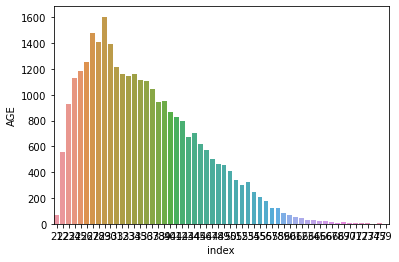

In [88]:
Day_df=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=Day_df)

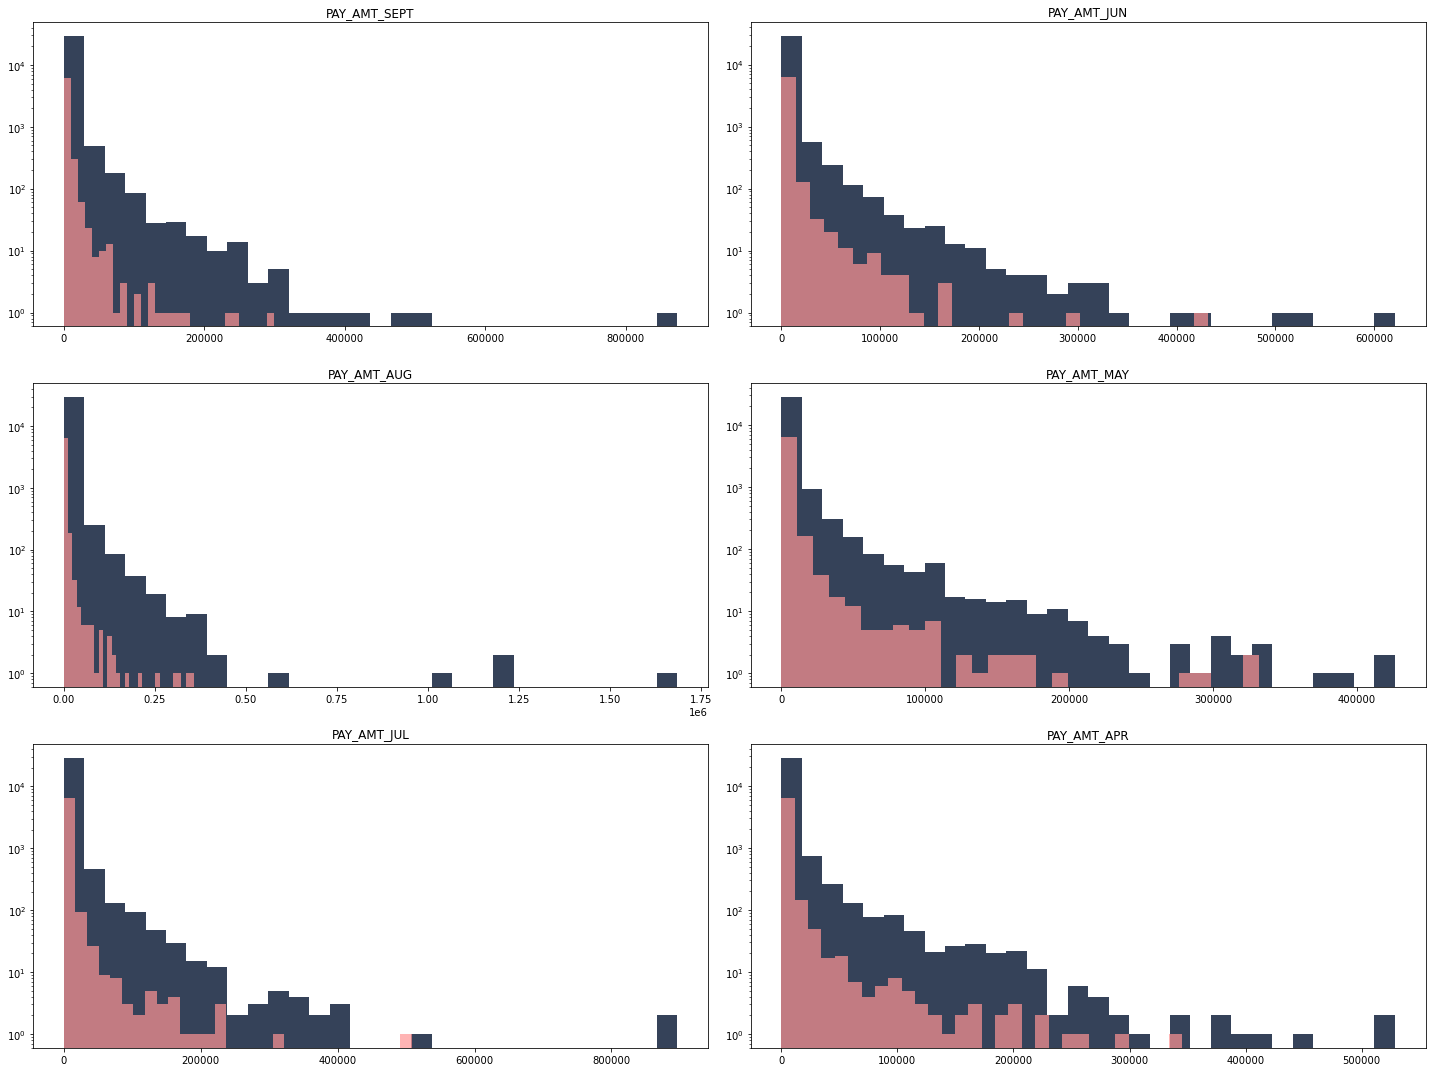

In [325]:
pay_amt_columns = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
figure, ax = plt.subplots(3, 2)
figure.set_size_inches(20,15)


for i in range(len(pay_amt_columns)):
    row,col =  i%3, int(i/3)
    
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='#354259')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['Y']==1)],30,color='#FF9494',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

<AxesSubplot:>

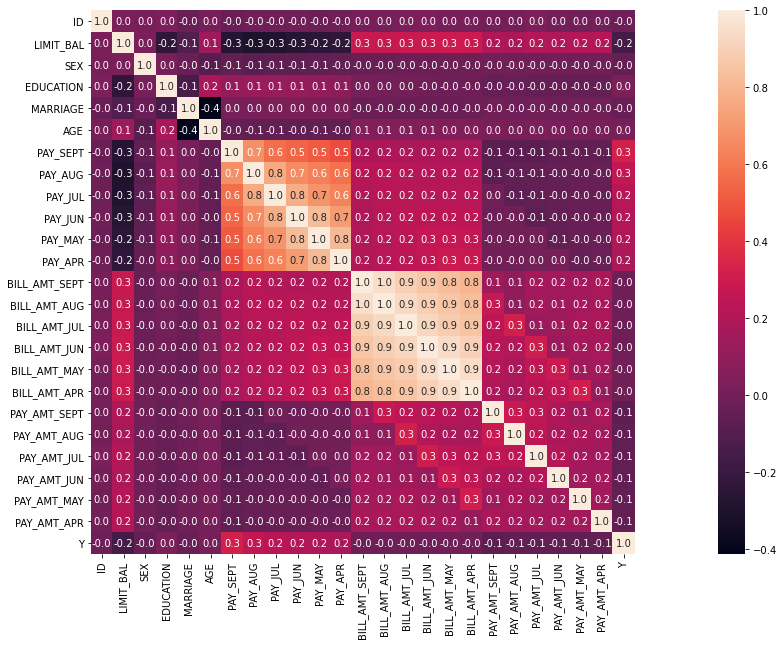

In [301]:
correlation = df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

Let’s explore histograms and check data for outliers using our expert judgment and the “rule of thumb” (Han, Jiawei and M. Kamber, 2006. Data Mining: Concepts and Techniques. San Francisco, CA: Morgan Kaufmann, 2006): outlier if bigger than
Q3+1.5∗IQR or less than Q1−1.5∗IQR


The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles. Quartiles divide a rank-ordered data set into four equal parts. The values that separate parts are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

In [89]:
def drop_upper_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    #outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    not_outliers = df[~(df>(q3+1.5*IQR+20000))] #Q3 limit is too low for our purposes
    outliers_dropped = not_outliers.dropna()

   
    return outliers_dropped

In [90]:
def drop_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    #outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR+20000)))] #Q3 limit is too low for our purposes
    outliers_dropped = not_outliers.dropna()

   
    return outliers_dropped

In [91]:
bill_amt_col = [ 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
pay_amt_col = ['LIMIT_BAL','PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
df_drop1 = drop_outliers_IQR(df[bill_amt_col])
df_drop2 = drop_upper_outliers_IQR(df[pay_amt_col])

In [92]:
new_df = df_drop2.join(df_drop1, how='inner')
new_df

,LIMIT_BAL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
0,20000.0,0.0,689.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,120000.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,90000.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,50000.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
5,50000.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,10000.0,2000.0,0.0,0.0,0.0,0.0,0.0,8802.0,10400.0,0.0,0.0,0.0,0.0
29994,80000.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0
29996,150000.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,30000.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0


In [93]:
df1 = df.iloc[:, [2,3,4,5,6,7,8,9,10,11,24]].join(new_df, how='inner')
df1

,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,Y,LIMIT_BAL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
0,2,2,1,24,2,2,-1,-1,-2,-2,1,20000.0,0.0,689.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2,2,2,26,-1,2,0,0,0,2,1,120000.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,2,2,2,34,0,0,0,0,0,0,0,90000.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,2,2,1,37,0,0,0,0,0,0,0,50000.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
5,1,1,2,37,0,0,0,0,0,0,0,50000.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,1,3,1,43,0,0,0,-2,-2,-2,0,10000.0,2000.0,0.0,0.0,0.0,0.0,0.0,8802.0,10400.0,0.0,0.0,0.0,0.0
29994,1,2,2,34,2,2,2,2,2,2,1,80000.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0
29996,1,3,2,43,-1,-1,-1,-1,0,0,0,150000.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,1,2,2,37,4,3,2,-1,0,0,1,30000.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0


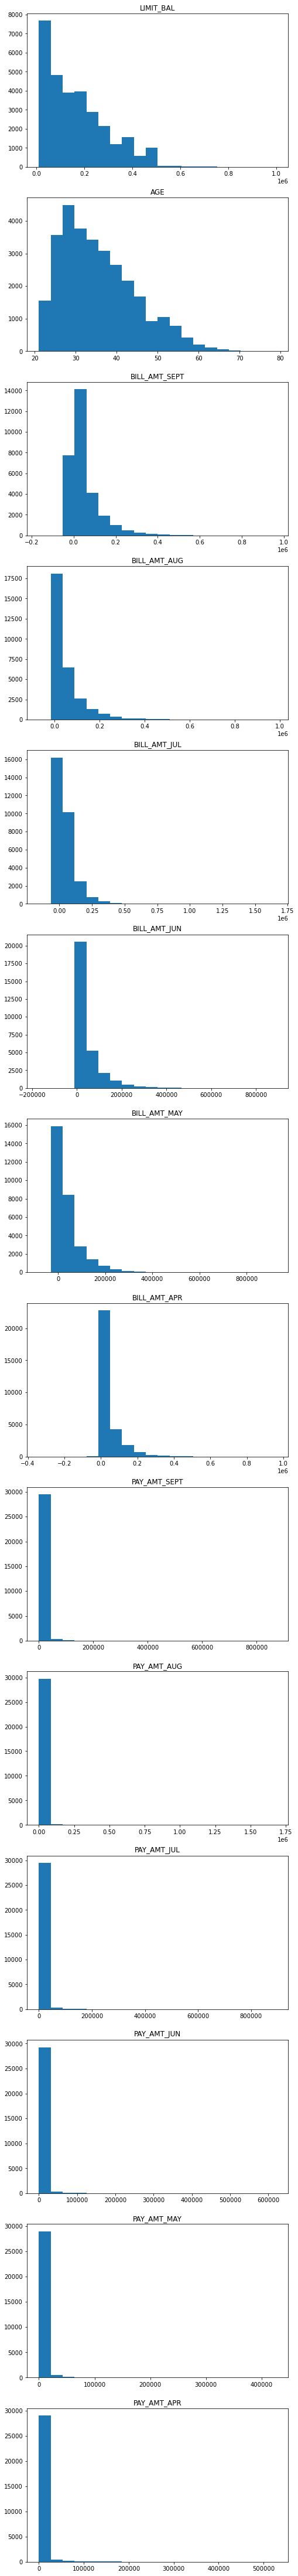

In [94]:
fig,ax = plt.subplots(14,1,figsize=[8,80])
i=0
for col in ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
              'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']:
    ax[i].hist(df[col],bins=20)
    ax[i].set_title(col)
    i+=1

## 3. IV vs WOE 

In [95]:
def calc_woe_iv(col) :
    df = pd.DataFrame(columns = ['values','total','good','bad','event_rate','non_event_rate',
                                 'per_total_events','per_total_non_events','WOE','IV'])
    df['values'] = df1[col].unique()
    df.set_index('values',inplace = True)
    
    values = df1[col].unique()
    total_dict = dict(df1.groupby(col).size())
    col_target_dict = dict(df1.groupby([col,'Y']).size())
    target_count = dict(df1.groupby(['Y']).size())
    
    for value in values :
        df.loc[value]['total'] = total_dict[value]
        if (value,1) in col_target_dict:
            df.loc[value]['good'] = col_target_dict[(value,1)]
        else :
            df.loc[value]['good'] = 0
        
        if (value,0) in col_target_dict:
            df.loc[value]['bad'] = col_target_dict[(value,0)]
        else :
            df.loc[value]['bad'] = 0
            
        if df.loc[value]['bad'] == 0 :
            df = df.drop([value])
        
    df['event_rate'] = df['good']/df['total']
    df['non_event_rate'] = df['bad']/df['total']
    
    df['per_total_events'] = df['good']/target_count[1]
    df['per_total_non_events'] = df['bad']/target_count[0]
    
    df['WOE'] = np.log(df.per_total_events.astype('float64')/df.per_total_non_events.astype('float64'))
    df['IV'] = (df['per_total_events'] - df['per_total_non_events']) * df['WOE']
    
    return df    

In [96]:
iv_values = pd.DataFrame(columns = ['col_name','iv_value'])

In [97]:
iv_values['col_name'] = df1.columns
iv_values.set_index(['col_name'],inplace = True)
iv_values.drop(['Y'],inplace = True)
iv_values

,iv_value
col_name,
SEX,NaN
EDUCATION,NaN
MARRIAGE,NaN
AGE,NaN
PAY_SEPT,NaN
PAY_AUG,NaN
PAY_JUL,NaN
PAY_JUN,NaN
PAY_MAY,NaN


In [98]:
# SEX
SEX_df = calc_woe_iv('SEX')
iv_values.loc['SEX'] = SEX_df.IV.sum()
print(iv_values.loc['SEX'])
SEX_df

iv_value    0.009803
Name: SEX, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
2,14724,3277,11447,0.222562,0.777438,0.570508,0.619091,-0.081725,0.00397
1,9510,2467,7043,0.259411,0.740589,0.429492,0.380909,0.120043,0.005832


In [99]:
#EDUCATION
EDUCATION_df = calc_woe_iv('EDUCATION')
iv_values.loc['EDUCATION'] = EDUCATION_df.IV.sum()
print(iv_values.loc['EDUCATION'])
EDUCATION_df

iv_value    0.034708
Name: EDUCATION, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
2,11552,2913,8639,0.252164,0.747836,0.507138,0.467226,0.081971,0.003272
1,8149,1686,6463,0.206897,0.793103,0.293524,0.34954,-0.174661,0.009784
3,4202,1121,3081,0.266778,0.733222,0.19516,0.166631,0.158041,0.004509
4,331,24,307,0.072508,0.927492,0.004178,0.016604,-1.379720,0.017143


In [100]:
# MARRIAGE
MARRIAGE_df = calc_woe_iv('MARRIAGE')
iv_values.loc['MARRIAGE'] = MARRIAGE_df.IV.sum()
print(iv_values.loc['MARRIAGE'])
MARRIAGE_df

iv_value    0.005559
Name: MARRIAGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
1,10914,2748,8166,0.251787,0.748213,0.478412,0.441644,0.079968,0.00294
2,12988,2916,10072,0.224515,0.775485,0.50766,0.544727,-0.070472,0.002612
3,332,80,252,0.240964,0.759036,0.013928,0.013629,0.021672,0.000006


In [101]:
# AGE
df1['age_bin'] = pd.qcut(df1['AGE'],  5)
AGE_df = calc_woe_iv('age_bin')
iv_values.loc['AGE'] = AGE_df.IV.sum()
print(iv_values.loc['AGE'])
AGE_df

iv_value    0.011542
Name: AGE, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(20.999, 27.0]",5830,1477,4353,0.253345,0.746655,0.257138,0.235425,0.088222,0.001916
"(31.0, 36.0]",4413,954,3459,0.216179,0.783821,0.166086,0.187074,-0.118997,0.002497
"(36.0, 43.0]",4778,1116,3662,0.233571,0.766429,0.19429,0.198053,-0.019184,0.000072
"(27.0, 31.0]",4404,937,3467,0.212761,0.787239,0.163127,0.187507,-0.139287,0.003396
"(43.0, 75.0]",4809,1260,3549,0.262009,0.737991,0.219359,0.191942,0.133520,0.003661


In [102]:
# PAY_SEPT
PAY_SEPT_df = calc_woe_iv('PAY_SEPT')
iv_values.loc['PAY_SEPT'] = PAY_SEPT_df.IV.sum()
print(iv_values.loc['PAY_SEPT'])
PAY_SEPT_df

iv_value    0.858162
Name: PAY_SEPT, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
2,2267,1585,682,0.699162,0.300838,0.27594,0.036885,2.012384,0.481071
-1,4635,854,3781,0.18425,0.81575,0.148677,0.204489,-0.318738,0.017789
0,11409,1535,9874,0.134543,0.865457,0.267235,0.534018,-0.692300,0.184694
-2,2241,328,1913,0.146363,0.853637,0.057103,0.103461,-0.594340,0.027553
1,3275,1151,2124,0.35145,0.64855,0.200383,0.114873,0.556404,0.047578
3,297,230,67,0.774411,0.225589,0.040042,0.003624,2.402461,0.087493
4,62,39,23,0.629032,0.370968,0.00679,0.001244,1.697142,0.009412
8,14,6,8,0.428571,0.571429,0.001045,0.000433,0.881392,0.000539
7,5,3,2,0.6,0.4,0.000522,0.000108,1.574539,0.000652


In [103]:
# PAY_AUG
#bins = [-2, 0, 2, 4, 6, 9]
#labels = ['<-1', '0-1', '2-3', '4-5', '6-8']
df1['pay_8_bin'] = pd.qcut(df1['PAY_AUG'],  2)#bins = bins, labels = labels)


PAY_AUG_df = calc_woe_iv('pay_8_bin')
iv_values.loc['PAY_AUG'] = PAY_AUG_df.IV.sum()
print(iv_values.loc['PAY_AUG'])
PAY_AUG_df

iv_value    0.52081
Name: PAY_AUG, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(0.0, 8.0]",3896,2190,1706,0.562115,0.437885,0.381267,0.092266,1.418824,0.410042
"(-2.001, 0.0]",20338,3554,16784,0.174747,0.825253,0.618733,0.907734,-0.383278,0.110768


In [104]:
# PAY_JUL
bins = [-2, 0, 2, 4, 6, 9]
labels = ['<-1', '0-1', '2-3', '4-5', '6-8']
df1['pay_7_bin'] = pd.qcut(df1['PAY_JUL'], 3) #bins = bins, labels = labels)

PAY_JUL_df = calc_woe_iv('pay_7_bin')
iv_values.loc['PAY_JUL'] = PAY_JUL_df.IV.sum()
print(iv_values.loc['PAY_JUL'])
PAY_JUL_df

iv_value    0.388318
Name: PAY_JUL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-2.001, -1.0]",8288,1533,6755,0.184966,0.815034,0.266887,0.365333,-0.313982,0.03091
"(-1.0, 0.0]",12195,2246,9949,0.184174,0.815826,0.391017,0.538075,-0.319247,0.046948
"(0.0, 8.0]",3751,1965,1786,0.52386,0.47614,0.342096,0.096593,1.264588,0.310461


In [105]:
# PAY_JUN
PAY_JUN_df = calc_woe_iv('PAY_JUN')
iv_values.loc['PAY_JUN'] = PAY_JUN_df.IV.sum()
print(iv_values.loc['PAY_JUN'])
PAY_JUN_df

iv_value    0.364562
Name: PAY_JUN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
-1,4568,786,3782,0.172067,0.827933,0.136838,0.204543,-0.401977,0.027216
0,12683,2465,10218,0.194355,0.805645,0.429143,0.552623,-0.252885,0.031226
-2,3852,796,3056,0.206646,0.793354,0.138579,0.165279,-0.176189,0.004704
2,2812,1490,1322,0.529872,0.470128,0.259401,0.071498,1.288705,0.242151
3,165,103,62,0.624242,0.375758,0.017932,0.003353,1.676669,0.024443
4,60,40,20,0.666667,0.333333,0.006964,0.001082,1.862221,0.010954
5,30,13,17,0.433333,0.566667,0.002263,0.000919,0.900810,0.001211
7,57,48,9,0.842105,0.157895,0.008357,0.000487,2.843051,0.022374
6,5,2,3,0.4,0.6,0.000348,0.000162,0.763609,0.000142


In [106]:
# PAY_MAY
PAY_MAY_df = calc_woe_iv('PAY_MAY')
iv_values.loc['PAY_MAY'] = PAY_MAY_df.IV.sum()
print(iv_values.loc['PAY_MAY'])
PAY_MAY_df

iv_value    0.32738
Name: PAY_MAY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
-2,4039,857,3182,0.212181,0.787819,0.149199,0.172093,-0.142753,0.003268
0,13035,2617,10418,0.200767,0.799233,0.455606,0.56344,-0.212432,0.022907
-1,4502,790,3712,0.175478,0.824522,0.137535,0.200757,-0.378219,0.023912
2,2337,1266,1071,0.54172,0.45828,0.220404,0.057923,1.336344,0.21713
3,167,107,60,0.640719,0.359281,0.018628,0.003245,1.747558,0.026883
4,76,46,30,0.605263,0.394737,0.008008,0.001622,1.596518,0.010195
7,58,48,10,0.827586,0.172414,0.008357,0.000541,2.737690,0.021397
5,16,9,7,0.5625,0.4375,0.001567,0.000379,1.420389,0.001688


In [107]:
# PAY_APR
PAY_APR_df = calc_woe_iv('PAY_APR')
iv_values.loc['PAY_APR'] = PAY_APR_df.IV.sum()
print(iv_values.loc['PAY_APR'])
PAY_APR_df

iv_value    0.285022
Name: PAY_APR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
-2,4399,937,3462,0.213003,0.786997,0.163127,0.187236,-0.137844,0.003323
2,2444,1247,1197,0.510229,0.489771,0.217096,0.064738,1.209996,0.184353
0,12420,2501,9919,0.201369,0.798631,0.435411,0.536452,-0.208687,0.021086
-1,4672,858,3814,0.183647,0.816353,0.149373,0.206274,-0.322755,0.018365
3,175,110,65,0.628571,0.371429,0.01915,0.003515,1.695167,0.026504
4,47,31,16,0.659574,0.340426,0.005397,0.000865,1.830473,0.008295
6,17,13,4,0.764706,0.235294,0.002263,0.000216,2.347729,0.004806
7,46,38,8,0.826087,0.173913,0.006616,0.000433,2.727219,0.016862
5,12,7,5,0.583333,0.416667,0.001219,0.00027,1.505546,0.001428


In [108]:
# LIMIT_BAL

#bins = [0, 100000, 200000, 300000, 400000, 800000, 1100000]
#labels = ['<50000', '5-80000', '150000', '230000', '1200000']
df1['limit_bin'] = pd.qcut(df1['LIMIT_BAL'],  5)#, labels = labels)


In [109]:
LIMIT_BAL_df = calc_woe_iv('limit_bin')
iv_values.loc['LIMIT_BAL'] = LIMIT_BAL_df.IV.sum()
print(iv_values.loc['LIMIT_BAL'])
LIMIT_BAL_df

iv_value    0.140069
Name: LIMIT_BAL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(9999.999, 50000.0]",7449,2389,5060,0.320714,0.679286,0.415912,0.273661,0.418583,0.059544
"(80000.0, 150000.0]",4894,1142,3752,0.233347,0.766653,0.198816,0.20292,-0.020434,0.000084
"(150000.0, 230000.0]",4446,767,3679,0.172515,0.827485,0.133531,0.198972,-0.398835,0.0261
"(230000.0, 540000.0]",4538,678,3860,0.149405,0.850595,0.118036,0.208761,-0.570201,0.051732
"(50000.0, 80000.0]",2907,768,2139,0.26419,0.73581,0.133705,0.115684,0.144770,0.002609


In [110]:
# PAY_AMT_SEPT
df1['PAY_AMT_9_bin'] = pd.qcut(df1['PAY_AMT_SEPT'],  5)

PAY_AMT_SEPT_df = calc_woe_iv('PAY_AMT_9_bin')
iv_values.loc['PAY_AMT_SEPT'] = PAY_AMT_SEPT_df.IV.sum()
print(iv_values.loc['PAY_AMT_SEPT'])
PAY_AMT_SEPT_df

iv_value    0.155191
Name: PAY_AMT_SEPT, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-0.001, 10.0]",4852,1771,3081,0.365004,0.634996,0.308322,0.166631,0.615364,0.087192
"(1500.0, 2400.0]",4738,1060,3678,0.223723,0.776277,0.18454,0.198918,-0.075026,0.001079
"(2400.0, 4424.8]",4805,1066,3739,0.221852,0.778148,0.185585,0.202217,-0.085831,0.001428
"(10.0, 1500.0]",4992,1156,3836,0.231571,0.768429,0.201253,0.207463,-0.030390,0.000189
"(4424.8, 31008.0]",4847,691,4156,0.142562,0.857438,0.120299,0.22477,-0.625094,0.065304


In [111]:
# PAY_AMT_AUG
df1['PAY_AMT_8_bin'] = pd.qcut(df1['PAY_AMT_AUG'],  4)

PAY_AMT_AUG_df = calc_woe_iv('PAY_AMT_8_bin')
iv_values.loc['PAY_AMT_AUG'] = PAY_AMT_AUG_df.IV.sum()
print(iv_values.loc['PAY_AMT_AUG'])
PAY_AMT_AUG_df

iv_value    0.100941
Name: PAY_AMT_AUG, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(396.0, 1819.0]",6030,1451,4579,0.24063,0.75937,0.252611,0.247647,0.019847,0.000099
"(1819.0, 3500.0]",6111,1371,4740,0.22435,0.77565,0.238684,0.256355,-0.071423,0.001262
"(-0.001, 396.0]",6089,1956,4133,0.321235,0.678765,0.340529,0.223526,0.420972,0.049255
"(3500.0, 31209.0]",6004,966,5038,0.160893,0.839107,0.168175,0.272472,-0.482526,0.050326


In [112]:
# PAY_AMT_JUL
df1['PAY_AMT_7_bin'] = pd.qcut(df1['PAY_AMT_JUL'],  4)
PAY_AMT_JUL_df = calc_woe_iv('PAY_AMT_7_bin')
iv_values.loc['PAY_AMT_JUL'] = PAY_AMT_JUL_df.IV.sum()
print(iv_values.loc['PAY_AMT_JUL'])
PAY_AMT_JUL_df

iv_value    0.091634
Name: PAY_AMT_JUL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-0.001, 230.0]",6060,1937,4123,0.319637,0.680363,0.337221,0.222985,0.413634,0.047252
"(230.0, 1453.0]",6058,1433,4625,0.236547,0.763453,0.249478,0.250135,-0.002632,0.000002
"(3000.0, 30498.0]",5985,993,4992,0.165915,0.834085,0.172876,0.269984,-0.445787,0.043289
"(1453.0, 3000.0]",6131,1381,4750,0.225249,0.774751,0.240425,0.256896,-0.066263,0.001091


In [113]:
# PAY_AMT_JUN
df1['PAY_AMT_6_bin'] = pd.qcut(df1['PAY_AMT_JUN'],  4)
PAY_AMT_JUN_df = calc_woe_iv('PAY_AMT_6_bin')
iv_values.loc['PAY_AMT_JUN'] = PAY_AMT_JUN_df.IV.sum()
print(iv_values.loc['PAY_AMT_JUN'])
PAY_AMT_JUN_df

iv_value    0.085561
Name: PAY_AMT_JUN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-0.001, 16.0]",6064,1916,4148,0.315963,0.684037,0.333565,0.224337,0.396688,0.043329
"(16.0, 1040.0]",6055,1407,4648,0.23237,0.76763,0.244951,0.251379,-0.025903,0.000167
"(1040.0, 3000.0]",6798,1552,5246,0.228302,0.771698,0.270195,0.283721,-0.048847,0.000661
"(3000.0, 29572.0]",5317,869,4448,0.163438,0.836562,0.151288,0.240562,-0.463792,0.041405


In [114]:
# PAY_AMT_MAY
df1['PAY_AMT_5_bin'] = pd.qcut(df1['PAY_AMT_MAY'],  3)
PAY_AMT_MAY_df = calc_woe_iv('PAY_AMT_5_bin')
iv_values.loc['PAY_AMT_MAY'] = PAY_AMT_MAY_df.IV.sum()
print(iv_values.loc['PAY_AMT_MAY'])
PAY_AMT_MAY_df

iv_value    0.055876
Name: PAY_AMT_MAY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-0.001, 468.0]",8079,2306,5773,0.285431,0.714569,0.401462,0.312223,0.251397,0.022435
"(468.0, 2000.0]",8210,1991,6219,0.242509,0.757491,0.346623,0.336344,0.030102,0.000309
"(2000.0, 29613.0]",7945,1447,6498,0.182127,0.817873,0.251915,0.351433,-0.332928,0.033132


In [115]:
# PAY_AMT_APR
df1['PAY_AMT_4_bin'] = pd.qcut(df1['PAY_AMT_APR'],  3)

PAY_AMT_APR_df = calc_woe_iv('PAY_AMT_4_bin')
iv_values.loc['PAY_AMT_APR'] = PAY_AMT_APR_df.IV.sum()
print(iv_values.loc['PAY_AMT_APR'])
PAY_AMT_APR_df

iv_value    0.057665
Name: PAY_AMT_APR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-0.001, 390.0]",8166,2316,5850,0.283615,0.716385,0.403203,0.316387,0.242474,0.021051
"(390.0, 2000.0]",8349,2045,6304,0.24494,0.75506,0.356024,0.340941,0.043288,0.000653
"(2000.0, 29708.0]",7719,1383,6336,0.179168,0.820832,0.240773,0.342672,-0.352918,0.035962


In [116]:
# BILL_AMT_SEPT
df1['BILL_AMT_9_bin'] = pd.qcut(df1['BILL_AMT_SEPT'],  4)
BILL_AMT_SEPT_df = calc_woe_iv('BILL_AMT_9_bin')
iv_values.loc['BILL_AMT_SEPT'] = BILL_AMT_SEPT_df.IV.sum()
print(iv_values.loc['BILL_AMT_SEPT'])
BILL_AMT_SEPT_df

iv_value    0.007351
Name: BILL_AMT_SEPT, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(2590.75, 18148.0]",6058,1448,4610,0.239023,0.760977,0.252089,0.249324,0.011030,0.00003
"(18148.0, 49695.75]",6058,1513,4545,0.249752,0.750248,0.263405,0.245809,0.069141,0.001217
"(49695.75, 182338.0]",6059,1281,4778,0.211421,0.788579,0.223015,0.25841,-0.147307,0.005214
"(-11545.001, 2590.75]",6059,1502,4557,0.247896,0.752104,0.26149,0.246458,0.059207,0.00089


In [117]:
# BILL_AMT_AUG
df1['BILL_AMT_8_bin'] = pd.qcut(df1['BILL_AMT_AUG'],  4)
BILL_AMT_AUG_df = calc_woe_iv('BILL_AMT_8_bin')
iv_values.loc['BILL_AMT_AUG'] = BILL_AMT_AUG_df.IV.sum()
print(iv_values.loc['BILL_AMT_AUG'])
BILL_AMT_AUG_df

iv_value    0.006239
Name: BILL_AMT_AUG, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(2101.5, 17357.0]",6058,1456,4602,0.240343,0.759657,0.253482,0.248891,0.018276,0.000084
"(-30000.001, 2101.5]",6059,1399,4660,0.230896,0.769104,0.243558,0.252028,-0.034184,0.00029
"(17357.0, 48474.0]",6058,1563,4495,0.258006,0.741994,0.27211,0.243104,0.112716,0.003269
"(48474.0, 175427.0]",6059,1326,4733,0.218848,0.781152,0.23085,0.255976,-0.103318,0.002596


In [118]:
# BILL_AMT_JUL
df1['BILL_AMT_7_bin'] = pd.qcut(df1['BILL_AMT_JUL'],  4)
BILL_AMT_JUL_df = calc_woe_iv('BILL_AMT_7_bin')
iv_values.loc['BILL_AMT_JUL'] = BILL_AMT_JUL_df.IV.sum()
print(iv_values.loc['BILL_AMT_JUL'])
BILL_AMT_JUL_df

iv_value    0.006337
Name: BILL_AMT_JUL, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-25443.001, 1697.25]",6059,1407,4652,0.232217,0.767783,0.244951,0.251595,-0.026763,0.000178
"(1697.25, 16703.5]",6058,1395,4663,0.230274,0.769726,0.242862,0.25219,-0.037690,0.000352
"(45941.75, 166064.0]",6059,1357,4702,0.223964,0.776036,0.236247,0.2543,-0.073637,0.001329
"(16703.5, 45941.75]",6058,1585,4473,0.261638,0.738362,0.27594,0.241915,0.131599,0.004478


In [119]:
# BILL_AMT_JUN
df1['BILL_AMT_6_bin'] = pd.qcut(df1['BILL_AMT_JUN'],  4)
BILL_AMT_JUN_df = calc_woe_iv('BILL_AMT_6_bin')
iv_values.loc['BILL_AMT_JUN'] = BILL_AMT_JUN_df.IV.sum()
print(iv_values.loc['BILL_AMT_JUN'])
BILL_AMT_JUN_df

iv_value    0.011857
Name: BILL_AMT_JUN, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-46627.001, 1398.5]",6059,1449,4610,0.239148,0.760852,0.252263,0.249324,0.011720,0.000034
"(1398.5, 15264.0]",6058,1281,4777,0.211456,0.788544,0.223015,0.258356,-0.147097,0.005199
"(15264.0, 39209.75]",6058,1614,4444,0.266425,0.733575,0.280989,0.240346,0.156235,0.00635
"(39209.75, 152638.0]",6059,1400,4659,0.231061,0.768939,0.243733,0.251974,-0.033254,0.000274


In [120]:
# BILL_AMT_MAY
df1['BILL_AMT_5_bin'] = pd.qcut(df1['BILL_AMT_MAY'],  4)
BILL_AMT_MAY_df = calc_woe_iv('BILL_AMT_5_bin')
iv_values.loc['BILL_AMT_MAY'] = BILL_AMT_MAY_df.IV.sum()
print(iv_values.loc['BILL_AMT_MAY'])
BILL_AMT_MAY_df

iv_value    0.013846
Name: BILL_AMT_MAY, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-46627.001, 1002.25]",6059,1458,4601,0.240634,0.759366,0.25383,0.248837,0.019866,0.000099
"(1002.25, 13389.5]",6058,1247,4811,0.205844,0.794156,0.217096,0.260195,-0.181090,0.007805
"(13389.5, 33262.25]",6058,1608,4450,0.265434,0.734566,0.279944,0.240671,0.151161,0.005937
"(33262.25, 142795.0]",6059,1431,4628,0.236178,0.763822,0.24913,0.250297,-0.004677,0.000005


In [121]:
# BILL_AMT_APR
df1['BILL_AMT_4_bin'] = pd.qcut(df1['BILL_AMT_APR'],  4)
BILL_AMT_APR_df = calc_woe_iv('BILL_AMT_4_bin')
iv_values.loc['BILL_AMT_APR'] = BILL_AMT_APR_df.IV.sum()
print(iv_values.loc['BILL_AMT_APR'])
BILL_AMT_APR_df

iv_value    0.01282
Name: BILL_AMT_APR, dtype: object


,total,good,bad,event_rate,non_event_rate,per_total_events,per_total_non_events,WOE,IV
values,,,,,,,,,
"(-46627.001, 728.0]",6061,1423,4638,0.23478,0.76522,0.247737,0.250838,-0.012442,0.000039
"(728.0, 11472.5]",6056,1252,4804,0.206737,0.793263,0.217967,0.259816,-0.175632,0.00735
"(11472.5, 31079.0]",6058,1596,4462,0.263453,0.736547,0.277855,0.24132,0.140978,0.005151
"(31079.0, 140953.0]",6059,1473,4586,0.243109,0.756891,0.256442,0.248026,0.033367,0.000281


In [122]:
iv_values.sort_values(by = 'iv_value',ascending=False,inplace = True)
iv_values

,iv_value
col_name,
PAY_SEPT,0.858162
PAY_AUG,0.52081
PAY_JUL,0.388318
PAY_JUN,0.364562
PAY_MAY,0.32738
PAY_APR,0.285022
PAY_AMT_SEPT,0.155191
LIMIT_BAL,0.140069
PAY_AMT_AUG,0.100941


In [123]:
df1.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,Y,LIMIT_BAL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,age_bin,pay_8_bin,pay_7_bin,limit_bin,PAY_AMT_9_bin,PAY_AMT_8_bin,PAY_AMT_7_bin,PAY_AMT_6_bin,PAY_AMT_5_bin,PAY_AMT_4_bin,BILL_AMT_9_bin,BILL_AMT_8_bin,BILL_AMT_7_bin,BILL_AMT_6_bin,BILL_AMT_5_bin,BILL_AMT_4_bin
0,2,2,1,24,2,2,-1,-1,-2,-2,1,20000.0,0.0,689.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,"(20.999, 27.0]","(0.0, 8.0]","(-2.001, -1.0]","(9999.999, 50000.0]","(-0.001, 10.0]","(396.0, 1819.0]","(-0.001, 230.0]","(-0.001, 16.0]","(-0.001, 468.0]","(-0.001, 390.0]","(2590.75, 18148.0]","(2101.5, 17357.0]","(-25443.001, 1697.25]","(-46627.001, 1398.5]","(-46627.001, 1002.25]","(-46627.001, 728.0]"
1,2,2,2,26,-1,2,0,0,0,2,1,120000.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,"(20.999, 27.0]","(0.0, 8.0]","(-1.0, 0.0]","(80000.0, 150000.0]","(-0.001, 10.0]","(396.0, 1819.0]","(230.0, 1453.0]","(16.0, 1040.0]","(-0.001, 468.0]","(390.0, 2000.0]","(2590.75, 18148.0]","(-30000.001, 2101.5]","(1697.25, 16703.5]","(1398.5, 15264.0]","(1002.25, 13389.5]","(728.0, 11472.5]"
2,2,2,2,34,0,0,0,0,0,0,0,90000.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,"(31.0, 36.0]","(-2.001, 0.0]","(-1.0, 0.0]","(80000.0, 150000.0]","(1500.0, 2400.0]","(396.0, 1819.0]","(230.0, 1453.0]","(16.0, 1040.0]","(468.0, 2000.0]","(2000.0, 29708.0]","(18148.0, 49695.75]","(2101.5, 17357.0]","(1697.25, 16703.5]","(1398.5, 15264.0]","(13389.5, 33262.25]","(11472.5, 31079.0]"
3,2,2,1,37,0,0,0,0,0,0,0,50000.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,"(36.0, 43.0]","(-2.001, 0.0]","(-1.0, 0.0]","(9999.999, 50000.0]","(1500.0, 2400.0]","(1819.0, 3500.0]","(230.0, 1453.0]","(1040.0, 3000.0]","(468.0, 2000.0]","(390.0, 2000.0]","(18148.0, 49695.75]","(17357.0, 48474.0]","(45941.75, 166064.0]","(15264.0, 39209.75]","(13389.5, 33262.25]","(11472.5, 31079.0]"
5,1,1,2,37,0,0,0,0,0,0,0,50000.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,"(36.0, 43.0]","(-2.001, 0.0]","(-1.0, 0.0]","(9999.999, 50000.0]","(2400.0, 4424.8]","(396.0, 1819.0]","(230.0, 1453.0]","(16.0, 1040.0]","(468.0, 2000.0]","(390.0, 2000.0]","(49695.75, 182338.0]","(48474.0, 175427.0]","(45941.75, 166064.0]","(15264.0, 39209.75]","(13389.5, 33262.25]","(11472.5, 31079.0]"


In [124]:
df1.drop(['limit_bin', 'PAY_AMT_9_bin', 'PAY_AMT_8_bin', 'PAY_AMT_7_bin', 'PAY_AMT_6_bin', 'PAY_AMT_5_bin', 'PAY_AMT_4_bin', 
           'BILL_AMT_9_bin', 'BILL_AMT_8_bin', 'BILL_AMT_7_bin', 'BILL_AMT_6_bin', 'BILL_AMT_5_bin', 'BILL_AMT_4_bin', 
           'age_bin', 'pay_8_bin', 'pay_7_bin'], axis=1, inplace=True)

## 4. Handling with imbalanced data

In [293]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X = df1.drop(['Y'], axis=1)
y = df1['Y']
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 24234
Resampled dataset shape 36980


In [294]:
balance_df = pd.DataFrame(x_smote)
balance_df['Y'] = y_smote

In [295]:
balance_df['Y'].value_counts()

0    18490
1    18490
Name: Y, dtype: int64

In [128]:
balance_df

,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,LIMIT_BAL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,Y
0,2,2,1,24,2,2,-1,-1,-2,-2,20000.0,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,1
1,2,2,2,26,-1,2,0,0,0,2,120000.0,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,1
2,2,2,2,34,0,0,0,0,0,0,90000.0,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,0
3,2,2,1,37,0,0,0,0,0,0,50000.0,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,0
4,1,1,2,37,0,0,0,0,0,0,50000.0,2500.000000,1815.000000,657.000000,1000.000000,1000.000000,800.000000,64400.000000,57069.000000,57608.000000,19394.000000,19619.000000,20024.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36975,1,1,1,41,-1,-1,-1,-1,-1,1,150000.0,2048.710821,361.570380,0.000000,2207.085863,0.000000,444.430259,1486.137567,2042.119694,361.570380,0.000000,2207.085863,773.986595,1
36976,2,1,1,28,-1,-1,-1,-1,-1,0,120000.0,540.429712,989.593427,440.197594,468.121751,324.719494,190.283904,3302.052703,350.145809,987.095585,440.197594,468.121751,515.003398,1
36977,1,1,2,26,1,0,0,2,2,0,40000.0,2000.000000,3902.679138,1459.812926,26.791383,1557.133788,1557.133788,36474.601304,37563.333390,40543.851780,41007.869048,39139.489863,38886.058958,1
36978,2,1,1,47,1,-2,-2,-2,-2,-2,210000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [129]:
balance_df.isnull().sum()

SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
LIMIT_BAL        0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
Y                0
dtype: int64

## 5. Encoding

In [296]:
## One hot encoding
balance_df = pd.get_dummies(balance_df, columns=['EDUCATION','MARRIAGE', 'PAY_SEPT','PAY_AUG',
                                                 'PAY_JUL','PAY_JUN', 'PAY_MAY','PAY_APR'],  drop_first='True')

In [131]:
## StandardScale
numeric_col = ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
              'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR' ]
for col in numeric_col:
    balance_df[col] = StandardScaler().fit_transform(balance_df[[col]])

In [132]:
balance_df.head()

,SEX,AGE,LIMIT_BAL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,Y,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,2,-1.252250,-1.008750,-0.749325,-0.525720,-0.657387,-0.631374,-0.639636,-0.615678,-0.755824,-0.768523,-0.827342,-0.831107,-0.804239,-0.783569,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,-1.029943,-0.110034,-0.749325,-0.437646,-0.365084,-0.316204,-0.639636,0.007347,-0.789109,-0.807112,-0.768693,-0.727917,-0.690294,-0.675279,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,-0.140718,-0.379648,-0.314822,-0.296047,-0.365084,-0.316204,-0.325818,0.941886,-0.071038,-0.462364,-0.448611,-0.379146,-0.311256,-0.267224,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,0.192742,-0.739135,-0.176857,-0.149068,-0.306624,-0.284687,-0.304165,-0.304165,0.408929,0.496217,0.602890,0.061841,0.150825,0.197616,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0.192742,-0.739135,-0.033739,-0.206840,-0.465344,-0.316204,-0.325818,-0.366468,0.879675,0.743834,0.847638,-0.219472,-0.157207,-0.118620,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [290]:
balance_df.columns

Index(['SEX', 'AGE', 'LIMIT_BAL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'Y', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1',
       'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6',
       'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1',
       'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6',
       'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1',
       'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6',
       'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_1',
       'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_

## 6. Train/Test split

In [289]:
X = balance_df.drop(['Y'], axis=1)
y = balance_df['Y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 99)

In [173]:
iv_values

,iv_value
col_name,
PAY_SEPT,0.858162
PAY_AUG,0.52081
PAY_JUL,0.388318
PAY_JUN,0.364562
PAY_MAY,0.32738
PAY_APR,0.285022
PAY_AMT_SEPT,0.155191
LIMIT_BAL,0.140069
PAY_AMT_AUG,0.100941


In [174]:
#drop columns with iv < 0.01
balance_df_drop_iv = balance_df.drop([  'SEX', 'BILL_AMT_SEPT', 'BILL_AMT_JUL', 'BILL_AMT_AUG'], axis=1)
X_iv = balance_df_drop_iv.drop(['Y'], axis=1)
y_iv = balance_df_drop_iv['Y']
X_train_iv,X_test_iv,y_train_iv,y_test_iv = train_test_split(X_iv,y_iv,test_size = 0.3,random_state = 99)


## 7. Apply ML algorithm

#### 1. Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.748603,0.780841,0.700409,0.738441,0.749254


In [139]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

#### 2. K-Nearest Neighbour

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [242]:
y_pred = knn.predict(X_test)

In [243]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(res, ignore_index=True)


In [244]:
results 

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.748603,0.780841,0.700409,0.738441,0.749254
1,K-Nearest Neighbour,0.769064,0.769515,0.776908,0.773194,0.768958


#### 3. Support vetor machine

In [245]:
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [246]:
y_pred = scv.predict(X_test)

In [247]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(res, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.748603,0.780841,0.700409,0.738441,0.749254
1,K-Nearest Neighbour,0.769064,0.769515,0.776908,0.773194,0.768958
2,Support Vector Machine,0.770957,0.814800,0.709126,0.758299,0.771793


#### 4. Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)

In [249]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(res, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.748603,0.780841,0.700409,0.738441,0.749254
1,K-Nearest Neighbour,0.769064,0.769515,0.776908,0.773194,0.768958
2,Support Vector Machine,0.770957,0.814800,0.709126,0.758299,0.771793
3,Decision Tree Classifier,0.740761,0.734816,0.764099,0.749171,0.740445


#### 5. Random Forest

In [250]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [251]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(res, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.748603,0.780841,0.700409,0.738441,0.749254
1,K-Nearest Neighbour,0.769064,0.769515,0.776908,0.773194,0.768958
2,Support Vector Machine,0.770957,0.814800,0.709126,0.758299,0.771793
3,Decision Tree Classifier,0.740761,0.734816,0.764099,0.749171,0.740445
4,Random tree Classifier,0.825401,0.853009,0.791852,0.821293,0.825855


#### 6. XGBoost

In [252]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [253]:
y_pred = xgb.predict(X_test)

In [254]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(res, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.748603,0.780841,0.700409,0.738441,0.749254
1,K-Nearest Neighbour,0.769064,0.769515,0.776908,0.773194,0.768958
2,Support Vector Machine,0.770957,0.814800,0.709126,0.758299,0.771793
3,Decision Tree Classifier,0.740761,0.734816,0.764099,0.749171,0.740445
4,Random tree Classifier,0.825401,0.853009,0.791852,0.821293,0.825855
5,XGBOOST Classifier,0.810258,0.834730,0.779932,0.806401,0.810668


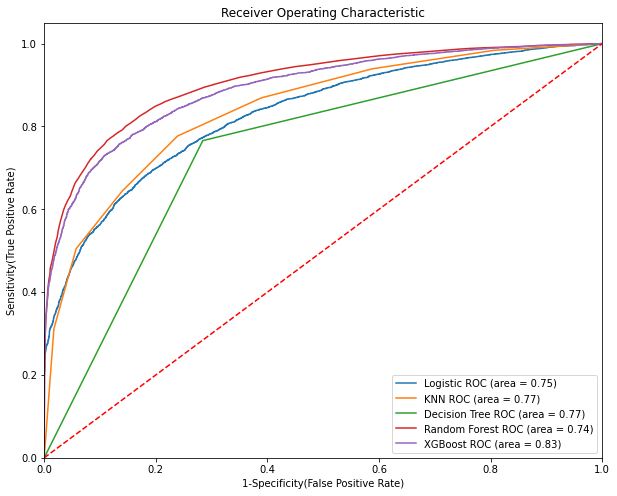

In [261]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_log_p = logmodel.predict_proba(X_test)[:,1]
#y_pred_svc_p = scv.predict_proba(X_test)[:,1]
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_dt_p = dct.predict_proba(X_test)[:,1]
y_pred_rf_p = rfc.predict_proba(X_test)[:,1]
y_pred_xgb_p = xgb.predict_proba(X_test)[:,1]

model = [logmodel,scv,knn,dct,rfc,xgb]

models=[y_pred_log_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
label=['Logistic' ,'KNN','Decision Tree','Random Forest','XGBoost']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(5)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 8.Optimization model

There is a better way to get parameters right, which is to use GridSearchCV. Essentially giving a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

#### 1. Logistic model
- Drop column with IV value < 0.02

In [ ]:
iv_values

In [262]:
from sklearn.model_selection import GridSearchCV , cross_val_score

In [263]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search_log.fit(X_train_iv,y_train_iv)
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    rais

Accuracy on Cross Validation set : 0.7357250655639154


C:\Users\Laptop MD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [266]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [267]:
y_pred_log = grid_search_log.predict(X_test_iv)
roc=roc_auc_score(y_test_iv, y_pred_log)
acc = accuracy_score(y_test_iv, y_pred_log)
prec = precision_score(y_test_iv, y_pred_log)
rec = recall_score(y_test_iv, y_pred_log)
f1 = f1_score(y_test_iv, y_pred_log)

In [268]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.740761,0.770977,0.694716,0.730863,0.741383


#### 2. Support Vector Machine

scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]
               
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

best_parameters = grid_search_1.best_params_
best_parameters

roc=roc_auc_score(y_test, y_pred_svc)
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

### Random forest

In [270]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [271]:
y_pred_rf = grid_search_rf.predict(X_test)
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.740761,0.770977,0.694716,0.730863,0.741383
1,Random Forest Tuned,0.829367,0.856542,0.796655,0.825514,0.829810


In [ ]:
## XGBoost

In [272]:
import optuna

In [273]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [274]:
import warnings
warnings.filterwarnings('ignore')

In [275]:
study = optuna.create_study(direction='maximize')

[I 2023-03-14 20:49:33,175] A new study created in memory with name: no-name-28d0ff16-55b8-426a-9942-15d1800a4e19


In [276]:
study.optimize(objective, n_trials=100)

[I 2023-03-14 20:49:43,455] Trial 0 finished with value: 0.7368848025959979 and parameters: {'max_depth': 1, 'learning_rate': 0.033221423773532134, 'n_estimators': 315, 'min_child_weight': 1, 'gamma': 0.0002643600281213082, 'subsample': 0.5294638680205326, 'colsample_bytree': 0.4095690759718487, 'reg_alpha': 6.390118482636908e-08, 'reg_lambda': 0.010208162136777723}. Best is trial 0 with value: 0.7368848025959979.
[I 2023-03-14 20:49:46,315] Trial 1 finished with value: 0.6857760951865873 and parameters: {'max_depth': 2, 'learning_rate': 0.03669817631228203, 'n_estimators': 153, 'min_child_weight': 8, 'gamma': 0.00017782679818762953, 'subsample': 0.09649767141591742, 'colsample_bytree': 0.024874274280521684, 'reg_alpha': 0.0011667871856746673, 'reg_lambda': 4.605256879904692e-07}. Best is trial 0 with value: 0.7368848025959979.
[I 2023-03-14 20:49:58,308] Trial 2 finished with value: 0.7706868577609519 and parameters: {'max_depth': 6, 'learning_rate': 0.016516473307435546, 'n_estimator

In [277]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8330629168920137
  Params: 
    max_depth: 9
    learning_rate: 0.3041813830210425
    n_estimators: 340
    min_child_weight: 5
    gamma: 0.13237164230775691
    subsample: 0.9970561095459104
    colsample_bytree: 0.8032554319209877
    reg_alpha: 0.12067164018297119
    reg_lambda: 0.0003543253840450521


In [278]:
params = trial.params
model = XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8032554319209877, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.13237164230775691, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3041813830210425, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=340, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [279]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model=  pd.DataFrame([['XGBoost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.740761,0.770977,0.694716,0.730863,0.741383
1,Random Forest Tuned,0.829367,0.856542,0.796655,0.825514,0.829810
2,XGBoost Tuned,0.833063,0.846225,0.819427,0.832610,0.833247
